# Advanced Regression

Tasks:
    1. Data exploration and missing value identification
    2. Missing value treatment and outlier analysis
    3. Exploratory Data Analysis to understand trend between the target Salesprice and various independant features
    4. Building a baseline Linear Regression model using RFE method
    5. Building a Linear Regression using Ridge model using Fine tuning mechanism
    6. Building a Linear Regression using Lasso model using Fine tuning mechanism
    7. Creating Metrics for each method obtained.
    8. Checking for assumptions in Linear Regression if met
    9. Solving the subjective questions

# 1.Data exploration and missing value identification

In [6]:
##Importing first-level necessary libraries and we shall import others as we proceed along
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
##Reading the dataset
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
##Printing the row and column of the data
print('The row count and column count are....',data.shape[0],'and',data.shape[1],'respectively')

The row count and column count are.... 1460 and 81 respectively


In [9]:
##Checking for duplicated data an dno duplicates
data.duplicated().sum()

0

# 2.Missing value treatment and outlier analysis

In [10]:
#### We have quite many columns and now let us find the null values and percentage of null values
null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc[null_values.sort_values(ascending=False)>0.4]


Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

We need to note that not all NA are original missing values, for example NA in Alley means no Alley and hence this should not 
be treated as missing value,similarly we club all such features together and replace with 'No'

The following are such features

1. Alley-NA
2. BsmtQual-NA
3. BsmtCond-NA
4. BsmtExposure-NA
5. BsmtFinType1-NA
6. BsmtFinType2 - NA
7. FireplaceQu - NA
8. GarageType - NA
9. GarageFinish - NA
10. GarageQual - NA
11. GarageCond - NA
12. PoolQC - NA
13. Fence - NA
14. MiscFeature-None


In [11]:
nulls_to_replace=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual',
'GarageCond','PoolQC','Fence','MiscFeature']

for i in nulls_to_replace:
    data[i].fillna('None',inplace=True)
    


In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [13]:
##Now we shall look at the other null values present in the data
null_values=data.isnull().sum()
null_values[null_values.sort_values(ascending=False)>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [14]:
## To deal with the missing values we need to know the datatype associated with it
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [15]:
##We shall split into numerical and object columns
numerical_int_cols=data.select_dtypes(include='int64')
numerical_int_cols.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [16]:
numerical_float_cols=data.select_dtypes(include='float64')
numerical_float_cols.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [17]:
object_cols=data.select_dtypes(include='object')
object_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [18]:
numerical_columns=numerical_int_cols.columns.tolist()+numerical_float_cols.columns.tolist()


In [19]:
##Imputing the missing values for the below columns and finding whether they bucket into numerical or cat columns

to_missing_impute=null_values[null_values.sort_values(ascending=False)>0].index.tolist()
for i in to_missing_impute:
    if i in numerical_columns:
        print(i,'is a numerical feature')
    else:
        print(i,'is a categorical feature')

LotFrontage is a numerical feature
MasVnrType is a categorical feature
MasVnrArea is a numerical feature
Electrical is a categorical feature
GarageYrBlt is a numerical feature


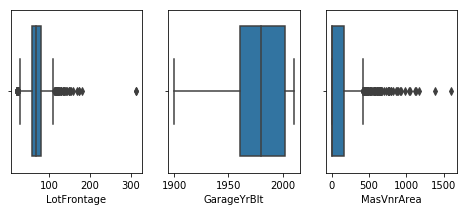

In [20]:
#Plot the boxplot to find is there any presence of an outlier for the numerical columns
plt.figure(figsize=[8,3])
ax0=plt.subplot(1,3,1)
sns.boxplot(data.LotFrontage)
ax1=plt.subplot(1,3,2)
sns.boxplot(data.GarageYrBlt)
ax2=plt.subplot(1,3,3)
sns.boxplot(data.MasVnrArea)
plt.show()

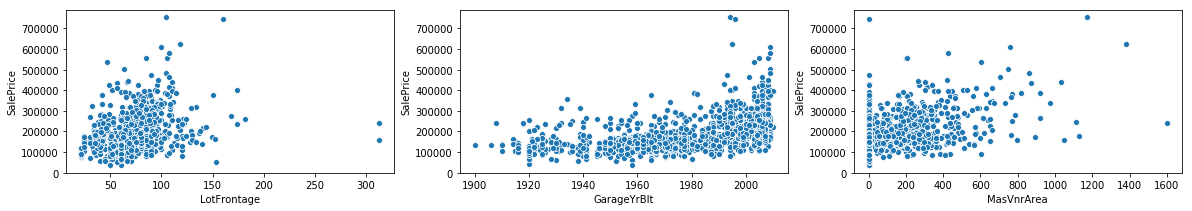

In [21]:
## Before imputing let us try how these variables affect Salesprice
plt.figure(figsize=[20,3])
ax0=plt.subplot(1,3,1)
sns.scatterplot(data.LotFrontage,data.SalePrice)
ax1=plt.subplot(1,3,2)
sns.scatterplot(data.GarageYrBlt,data.SalePrice)
ax2=plt.subplot(1,3,3)
sns.scatterplot(data.MasVnrArea,data.SalePrice)
plt.show()

In [22]:
##We could see that the Lot shows some good linear sign when compared to GarageYrBlt and MasVnArea
##as there is no going to be any undesirable changes will be brought to the salesprice we shall impute Lot and MAs using median and 
##Garage using mean value

data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.median(),inplace=True)
data.GarageYrBlt.fillna(data.GarageYrBlt.mean(),inplace=True)




In [23]:
##Now let us handle the categorical columns

print(data.MasVnrType.value_counts())
print('____________')
print(data.Electrical.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
____________
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [24]:
##We shall impute them suing the mode

data.MasVnrType.fillna(data.MasVnrType.mode()[0],inplace=True)
data.Electrical.fillna(data.Electrical.mode()[0],inplace=True)

In [25]:
##Re-checking the null values
data.isnull().sum().sum()

0

We are good with missing value imputation now we shall derive some new features from existing

1. We shall derive the house age from Buildyear and Yearsold columns.
2. We shall derive the garage age from GarageBuildyear and Yearsold columns.
3. We shall derive the Remodel age from YearRemodAdd and Buildyear columns.

In [26]:
##Let us observe are there any houses if garage is built before the house itself

print('Houses garage construction > original house construction count.....',data[data.GarageYrBlt>data.YearBuilt].shape[0])

##Let us check if there are any houses which were sold before it was constructed(ambiguity check)

print('Houses sold before construction count.....',data[data.YrSold<data.YearBuilt].shape[0])
print('Houses remodeled before construction....',data[data.YearRemodAdd<data.YearBuilt].shape[0])

Houses garage construction > original house construction count..... 354
Houses sold before construction count..... 0
Houses remodeled before construction.... 0


In [27]:
##Geeting the house age and remodelled gap
data['House_Age']=data['YrSold']-data['YearBuilt']
data['House_Remodel_Age']=data['YrSold']-data['YearRemodAdd']
data['Garage_Age']=data['YrSold']-data['GarageYrBlt']


In [28]:
##We shall now remove the YrSold,YearBuilt,YearRemodAdd and GarageYrBlt

data.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [29]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,House_Age,House_Remodel_Age,Garage_Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,208500,5,5,5.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,181500,31,31,31.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,223500,7,6,7.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,140000,91,36,8.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,250000,8,8,8.0


In [30]:
##Exploring the categorical variables further
object_cols.columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

For effective plotting and understanding the categorical data I did the following

1. In cols_toview, the independant variables are taken which contains unique values equally spread out.
2. In cols_nillvar,the independant variables which are having less values or mono-value centric (i.,e only one value has more freqency than the others)

In [31]:
cols_toview=[]
cols_nillvar=[]
for i in object_cols.columns.tolist():
    if (data[i].nunique()>5):
        cols_toview.append(i)
    else:
        cols_nillvar.append(i)
        
        
        

In [32]:
cols_toview

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SaleCondition']

In [33]:
cols_nillvar

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature']

# 3.Exploratory Data Analysis to understand trend between the target Salesprice and various independant features

Plotting high cardinal data vs SalesPrice

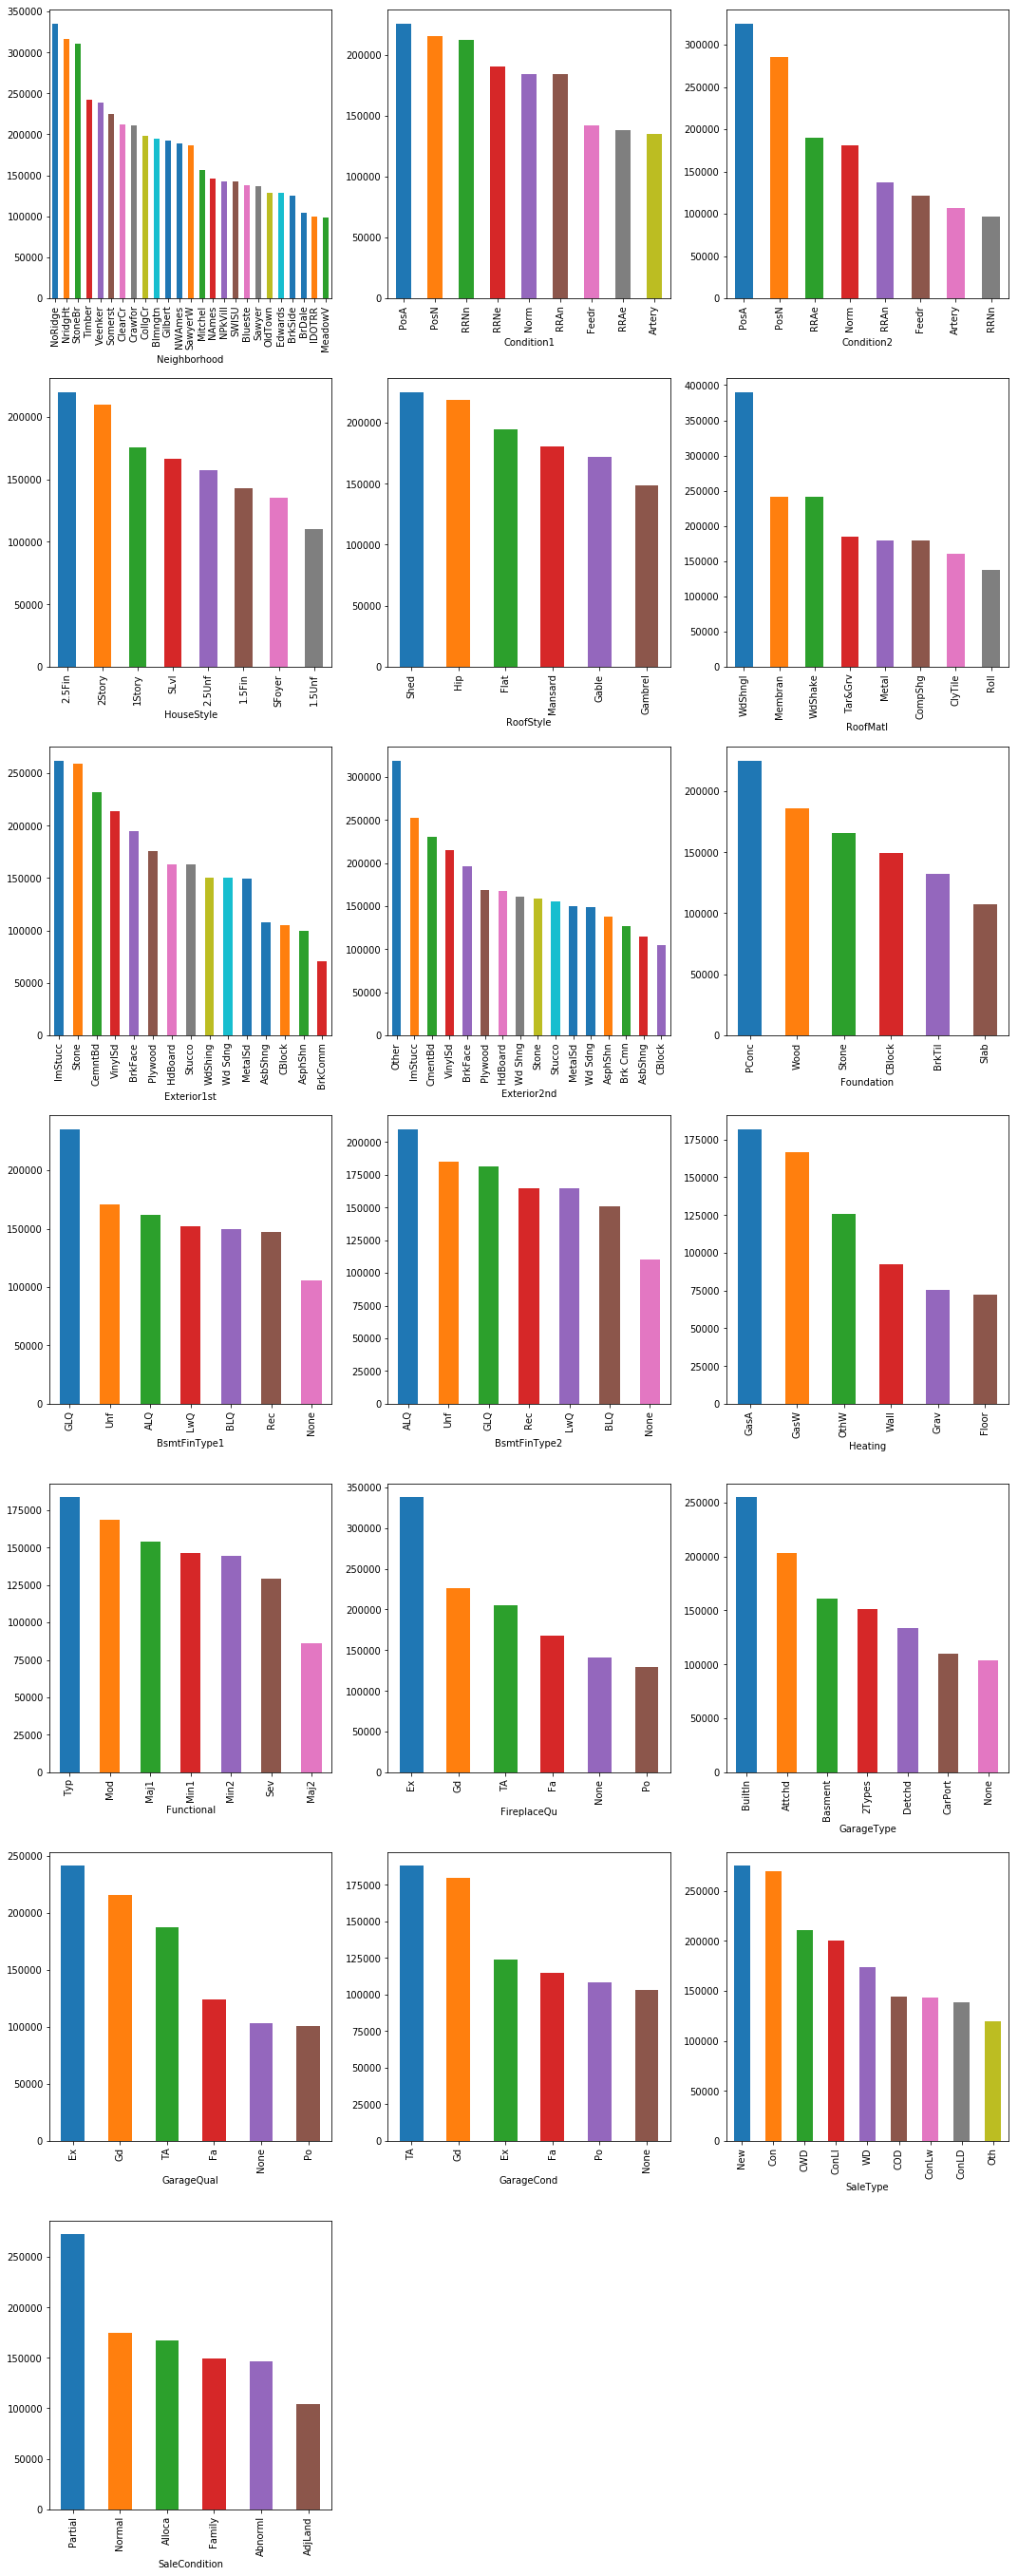

In [34]:
##Plotting cols_toview

fig = plt.figure(figsize=(15,80))
for i, col in enumerate(cols_toview):
    fig.add_subplot(15,3,i+1)
    fig.tight_layout()
    data.groupby(col)['SalePrice'].mean().sort_values(ascending=False).plot.bar()
plt.show()

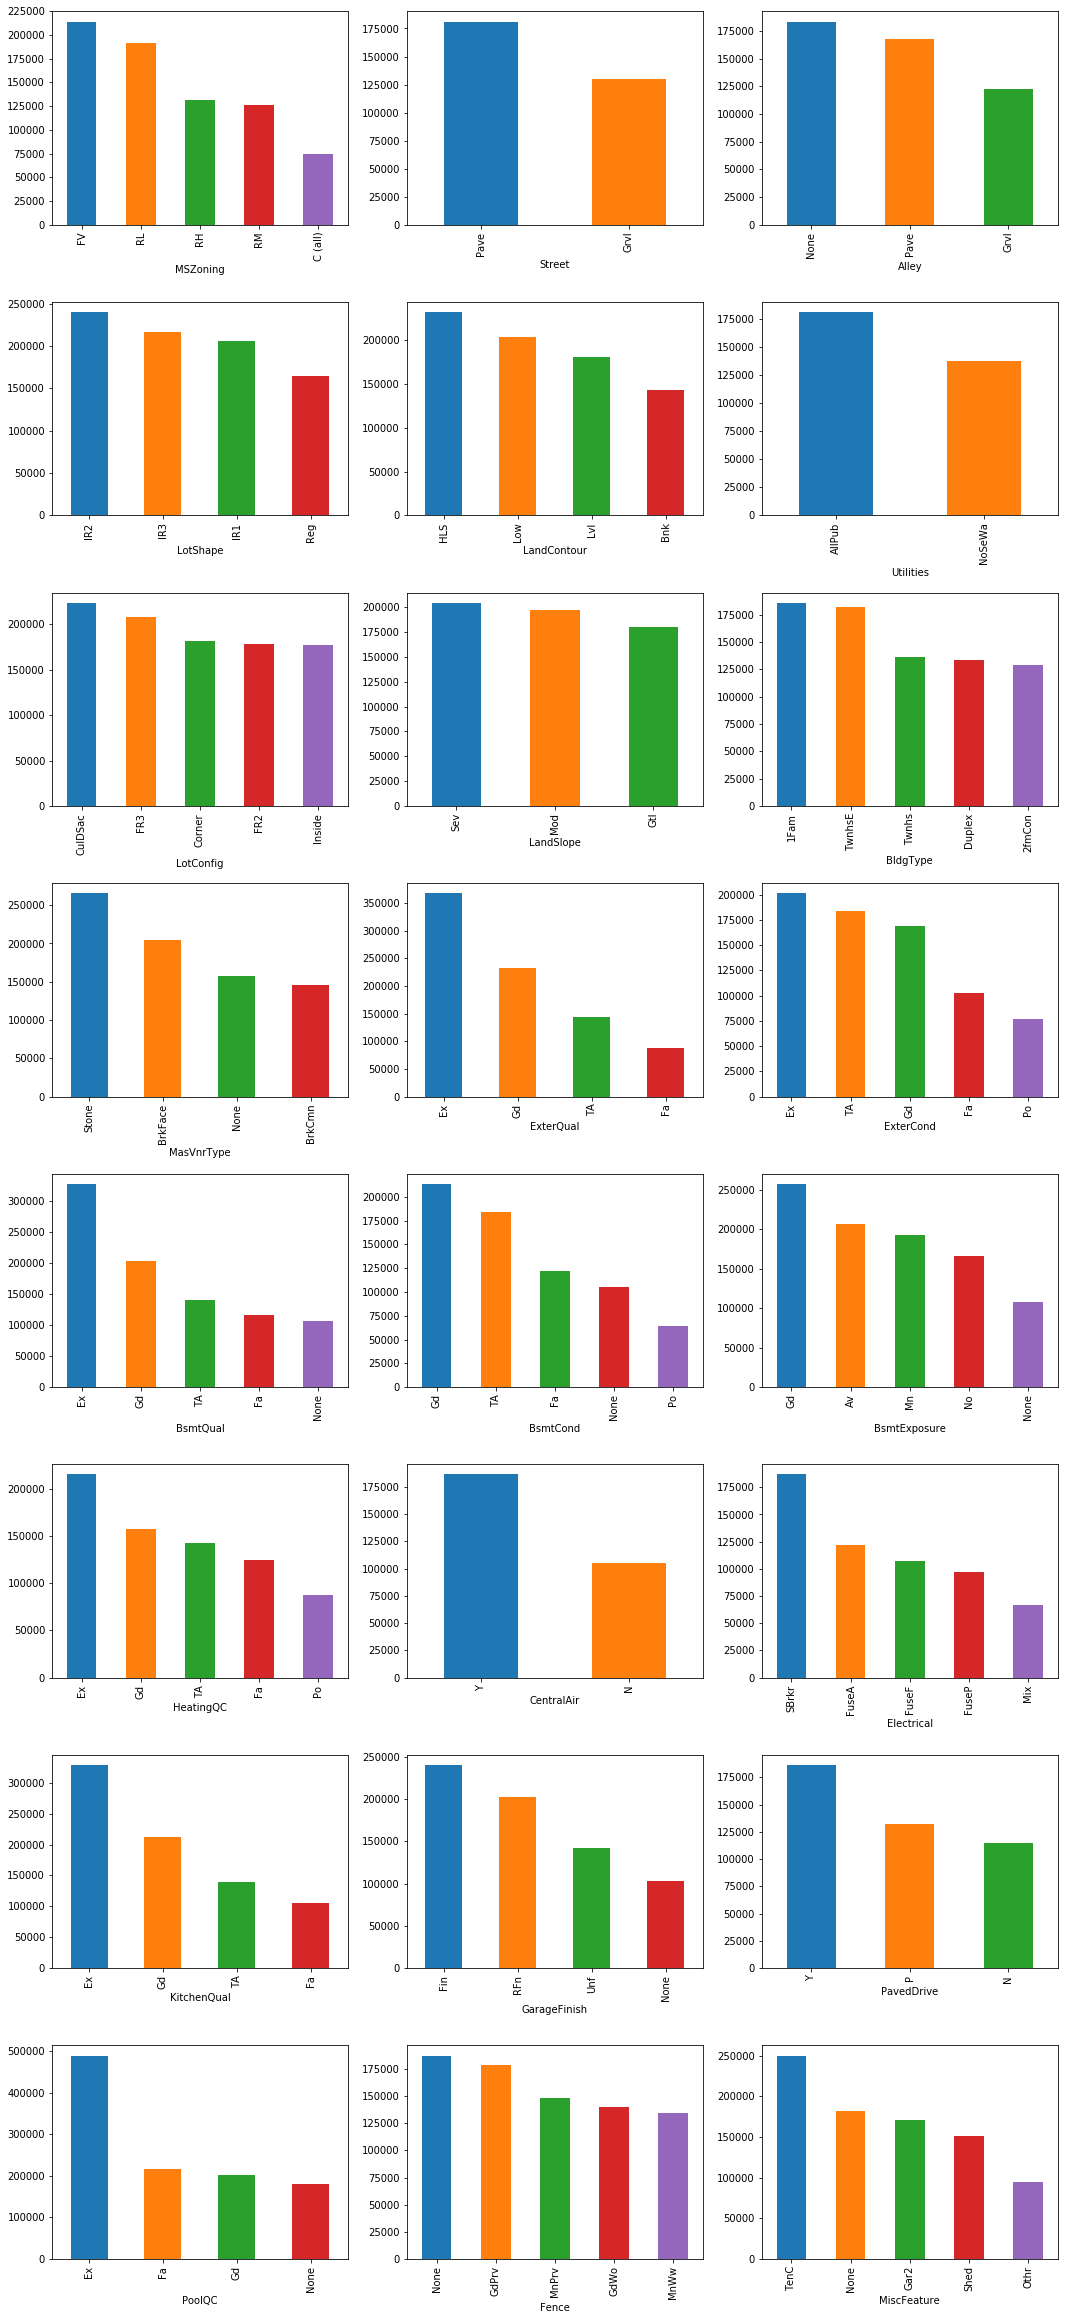

In [35]:
##Plotting cols_nillvar

fig = plt.figure(figsize=(15,80))
for i, col in enumerate(cols_nillvar):
    fig.add_subplot(20,3,i+1)
    fig.tight_layout()
    data.groupby(col)['SalePrice'].mean().sort_values(ascending=False).plot.bar()
plt.show()

Inferences:
    1. Some of the categorical features like KitchenQual,GarageFinish,HeatingQC,Electrical,BsmtQual and Salescondition 
       exhibit a sort of strong relation with the SalesPrice
        
    2. Some of the features like Fence,LandSlope,lotshape,functional do not seem to vary much with respect to SalePrice
    
    3. We shall group some values which exhibit same SalesPrice values to a common bucket especially we bucket some features            from Fence,LandSlope,lotshape,functional,bldgtype,MsZoning,GarageQual,GarageCond,SalesType,BsmtFintype1,BsmtFintype2 and        Heating

In [36]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
 

We shall combine two or more values in the below categorical features if the difference in SalePrice of them is no greater than 10,000 meaning that these two values which belong to the specific categorical value explain the SalePrice variable more or less the same.

In [37]:
##Plotting again the above features
for i in ['Fence','LandSlope','LotShape','Functional','BldgType','MSZoning','GarageQual','GarageCond','SaleType','BsmtFinType1','BsmtFinType2','Heating']:
    print(data.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
    print('____________')


Fence
None     187596.837998
GdPrv    178927.457627
MnPrv    148751.089172
GdWo     140379.314815
MnWw     134286.363636
Name: SalePrice, dtype: float64
____________
LandSlope
Sev    204379.230769
Mod    196734.138462
Gtl    179956.799566
Name: SalePrice, dtype: float64
____________
LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64
____________
Functional
Typ     183429.147059
Mod     168393.333333
Maj1    153948.142857
Min1    146385.483871
Min2    144240.647059
Sev     129000.000000
Maj2     85800.000000
Name: SalePrice, dtype: float64
____________
BldgType
1Fam      185763.807377
TwnhsE    181959.342105
Twnhs     135911.627907
Duplex    133541.076923
2fmCon    128432.258065
Name: SalePrice, dtype: float64
____________
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64
____________
GarageQual
Ex  

We shall group the values under the categorical independant variables whose difference in saleprice is less than 10,000 dollar so that we shall combine those values under a given independant feature

In [38]:
for i in ['Fence','LandSlope','LotShape','Functional','BldgType','MSZoning','GarageQual','GarageCond','SaleType','BsmtFinType1','BsmtFinType2','Heating']:
    a=data.groupby(i)['SalePrice'].mean().sort_values(ascending=False)
    b=a.values.tolist()
    for j in range(len(b)-1):
        if abs(round(b[j]-b[j+1],2))<10000:
            print('The feature',i,'can be combined as follows....',a.index.tolist()[j],a.index.tolist()[j+1])
    print('________________')
    


The feature Fence can be combined as follows.... None GdPrv
The feature Fence can be combined as follows.... MnPrv GdWo
The feature Fence can be combined as follows.... GdWo MnWw
________________
The feature LandSlope can be combined as follows.... Sev Mod
________________
The feature LotShape can be combined as follows.... IR3 IR1
________________
The feature Functional can be combined as follows.... Maj1 Min1
The feature Functional can be combined as follows.... Min1 Min2
________________
The feature BldgType can be combined as follows.... 1Fam TwnhsE
The feature BldgType can be combined as follows.... Twnhs Duplex
The feature BldgType can be combined as follows.... Duplex 2fmCon
________________
The feature MSZoning can be combined as follows.... RH RM
________________
The feature GarageQual can be combined as follows.... None Po
________________
The feature GarageCond can be combined as follows.... TA Gd
The feature GarageCond can be combined as follows.... Ex Fa
The feature Garage



1. Fence feature can be combined as None-GdPrv , MnPrv-GdWo
2. LandSlope feature can be combined as Sev-Mod
3. LotShape feature can be combined as IR3-IR1
4. Functional feature can be combined Maj-Min1-Min2
5. BldgType feature can be combined as 1Fam-TwnhsE and Twnhs-Duplex-2fmCon
6. MSZoning feature can be combined as RH-RM
7. GarageQual feature can be combined as None-Po
8. GarageCond feature can be combined as TA-Gd, Ex-Fa and Po-None
9. SaleType feature can be combined as New-Con,CSD-ConLI,COD-ConLw-ConLD
10. Heating  feature can be combined as Grav-Floor


In [39]:
data['Fence']=data['Fence'].replace(['None','GdPrv'],'None-GdPrv')
data['LandSlope']=data['LandSlope'].replace(['Sev','Mod'],'Sev-Mod')
data['LotShape']=data['LotShape'].replace(['IR3','IR1'],'IR3-IR1')
data['Functional']=data['Functional'].replace(['Maj','Min1','Min2'],'Maj-Min1-Min2')
data['BldgType']=data['BldgType'].replace(['1Fam','TwnhsE'],'1Fam-TwnhsE')
data['BldgType']=data['BldgType'].replace(['Twnhs','Duplex','2fmCon'],'Twnhs-Duplex-2fmCon')
data['MSZoning']=data['MSZoning'].replace(['RH','RM'],'RH-RM')
data['GarageQual']=data['GarageQual'].replace(['None','Po'],'None-Po')
data['GarageCond']=data['GarageCond'].replace(['TA','Gd'],'TA-Gd')
data['GarageCond']=data['GarageCond'].replace(['Ex','Fa'],'Ex-Fa')
data['GarageCond']=data['GarageCond'].replace(['Po','None'],'Po-None')
data['SaleType']=data['SaleType'].replace(['New','Con'],'New-Con')
data['SaleType']=data['SaleType'].replace(['CSD','ConLI'],'CSD-ConLI')
data['SaleType']=data['SaleType'].replace(['COD','ConLw','ConLD'],'COD-ConLw-ConLD')                                          
data['Heating']=data['Heating'].replace(['Grav','Floor'],'Grav-Floor')



The feature TotalBsmtSF= BsmtFinSF1+BsmtFinSF2+BsmtUnfSF,so we shall remove the redundant features as it might result in multi-collineraity problems

In [40]:
data.groupby('SaleType')['SalePrice'].mean().sort_values(ascending=False)

SaleType
New-Con            274859.201613
CWD                210600.000000
CSD-ConLI          200390.000000
WD                 173401.836622
COD-ConLw-ConLD    143129.438596
Oth                119850.000000
Name: SalePrice, dtype: float64

In [41]:
data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],inplace=True,axis=1)

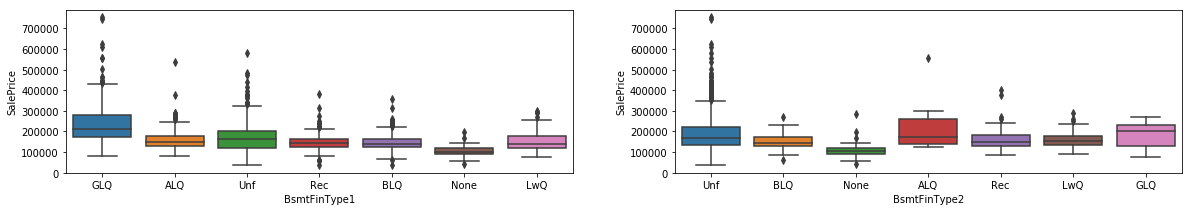

In [42]:
##Let us check BsmtFinType1 and BsmtFinType2 
plt.figure(figsize=[20,3])
ax0=plt.subplot(1,2,1)
sns.boxplot(x=data.BsmtFinType1,y=data.SalePrice)
ax0=plt.subplot(1,2,2)
sns.boxplot(x=data.BsmtFinType2,y=data.SalePrice)
plt.show()


We could find that BsmtFinType1 and BsmtFinType2 both are not showing similar trend with repsect to SalePrice so we need to retain
both of them

Numerical Variables vs SalePrice

In [43]:
numerical_columns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [44]:
##Removing Id column
data.drop('Id',axis=1,inplace=True)

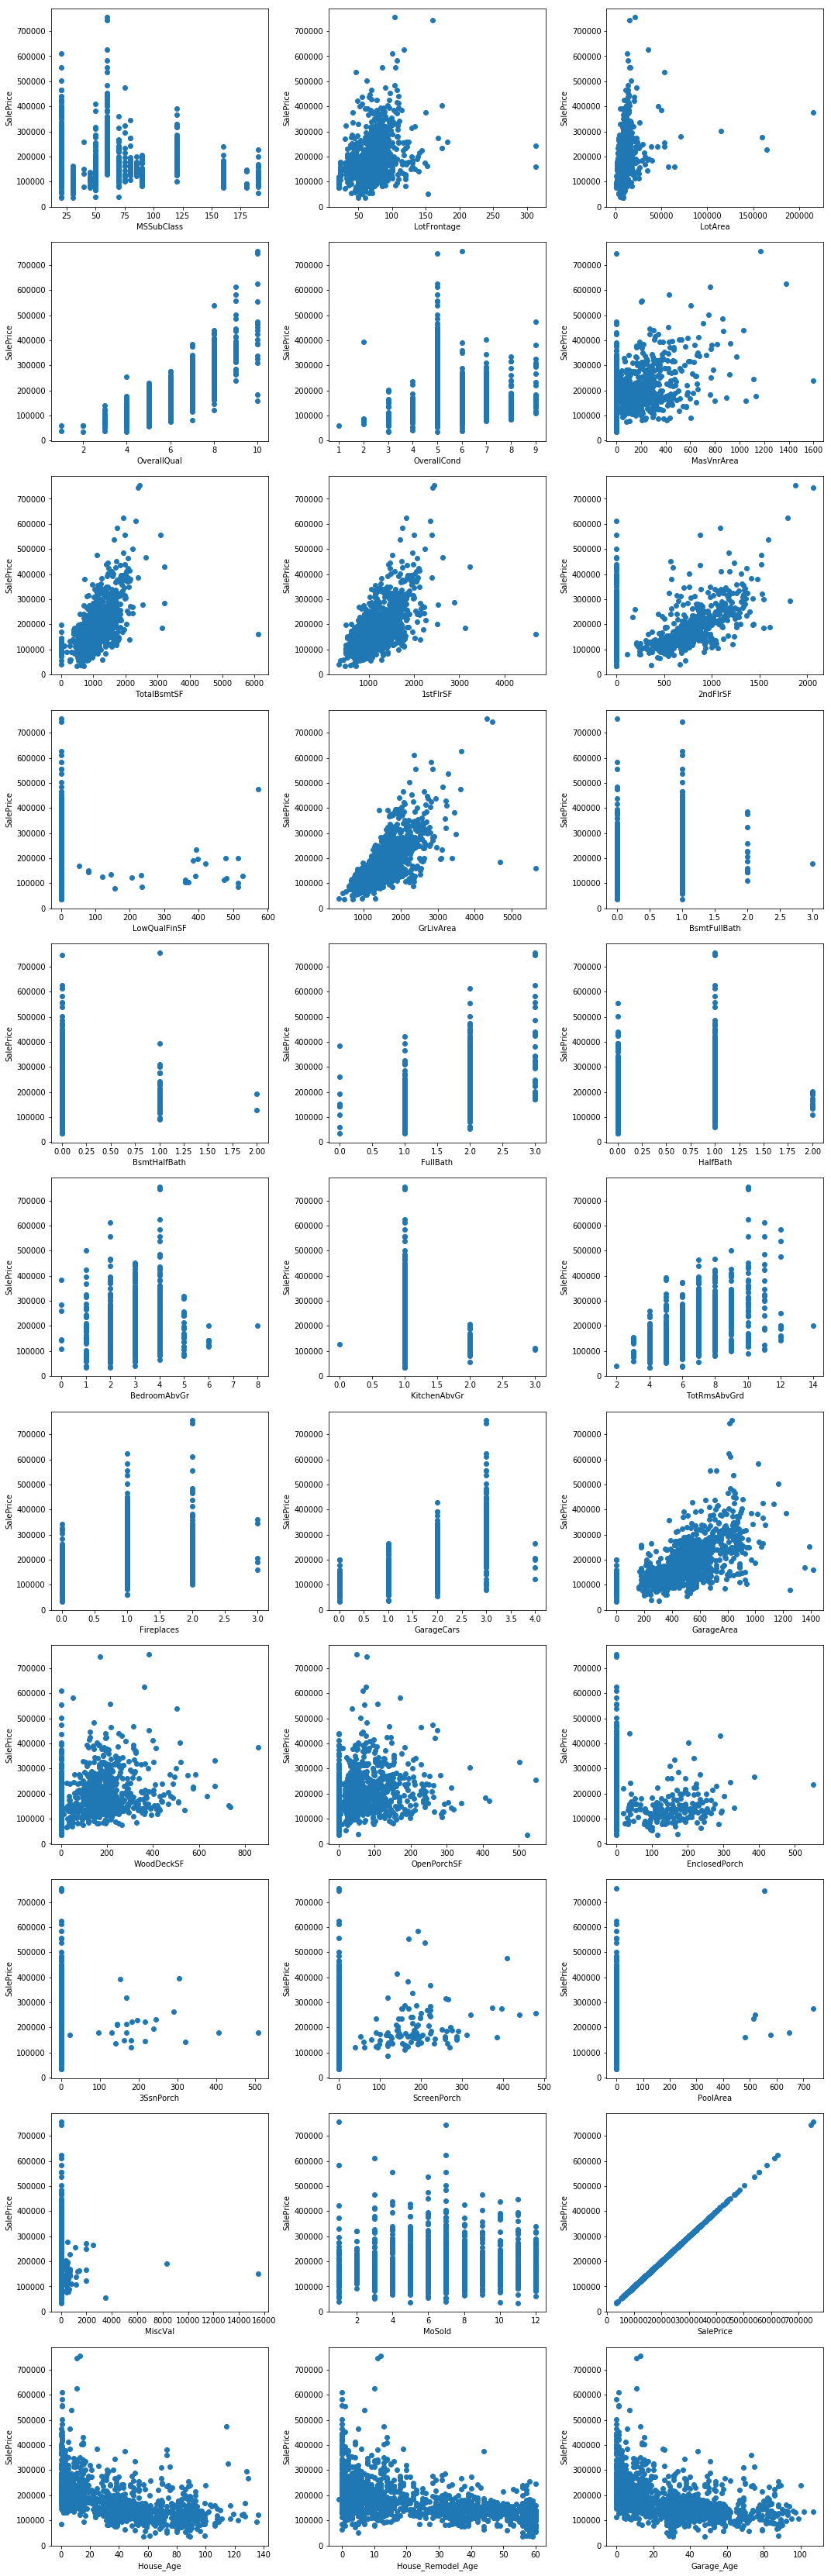

In [45]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(data.select_dtypes(exclude='object')):
    fig.add_subplot(12,3,1+i)
    plt.scatter(data[col], data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show()

Few Inferences from numerical features

1. Some features like LotFrontage,TotalBsmtSF,1stFlrSF,2ndFrSF,GrLivArea,GargageArea,WoodDeckSF,openPorchSF,EnclosedPorch are all
   showing linear trend with respect to the saleprice and this is quite understandable from the feature definition.
   
    
2. Some features like House_Age,House_Remodel_Age and Garage_Age (which were derived features)show declining trend as the number of
   years increase,this is also quite clear that as the age of the house and the duration of remodel of the house is more the saleprice
    reduces and vice-versa which are clearly captured in the plot
    

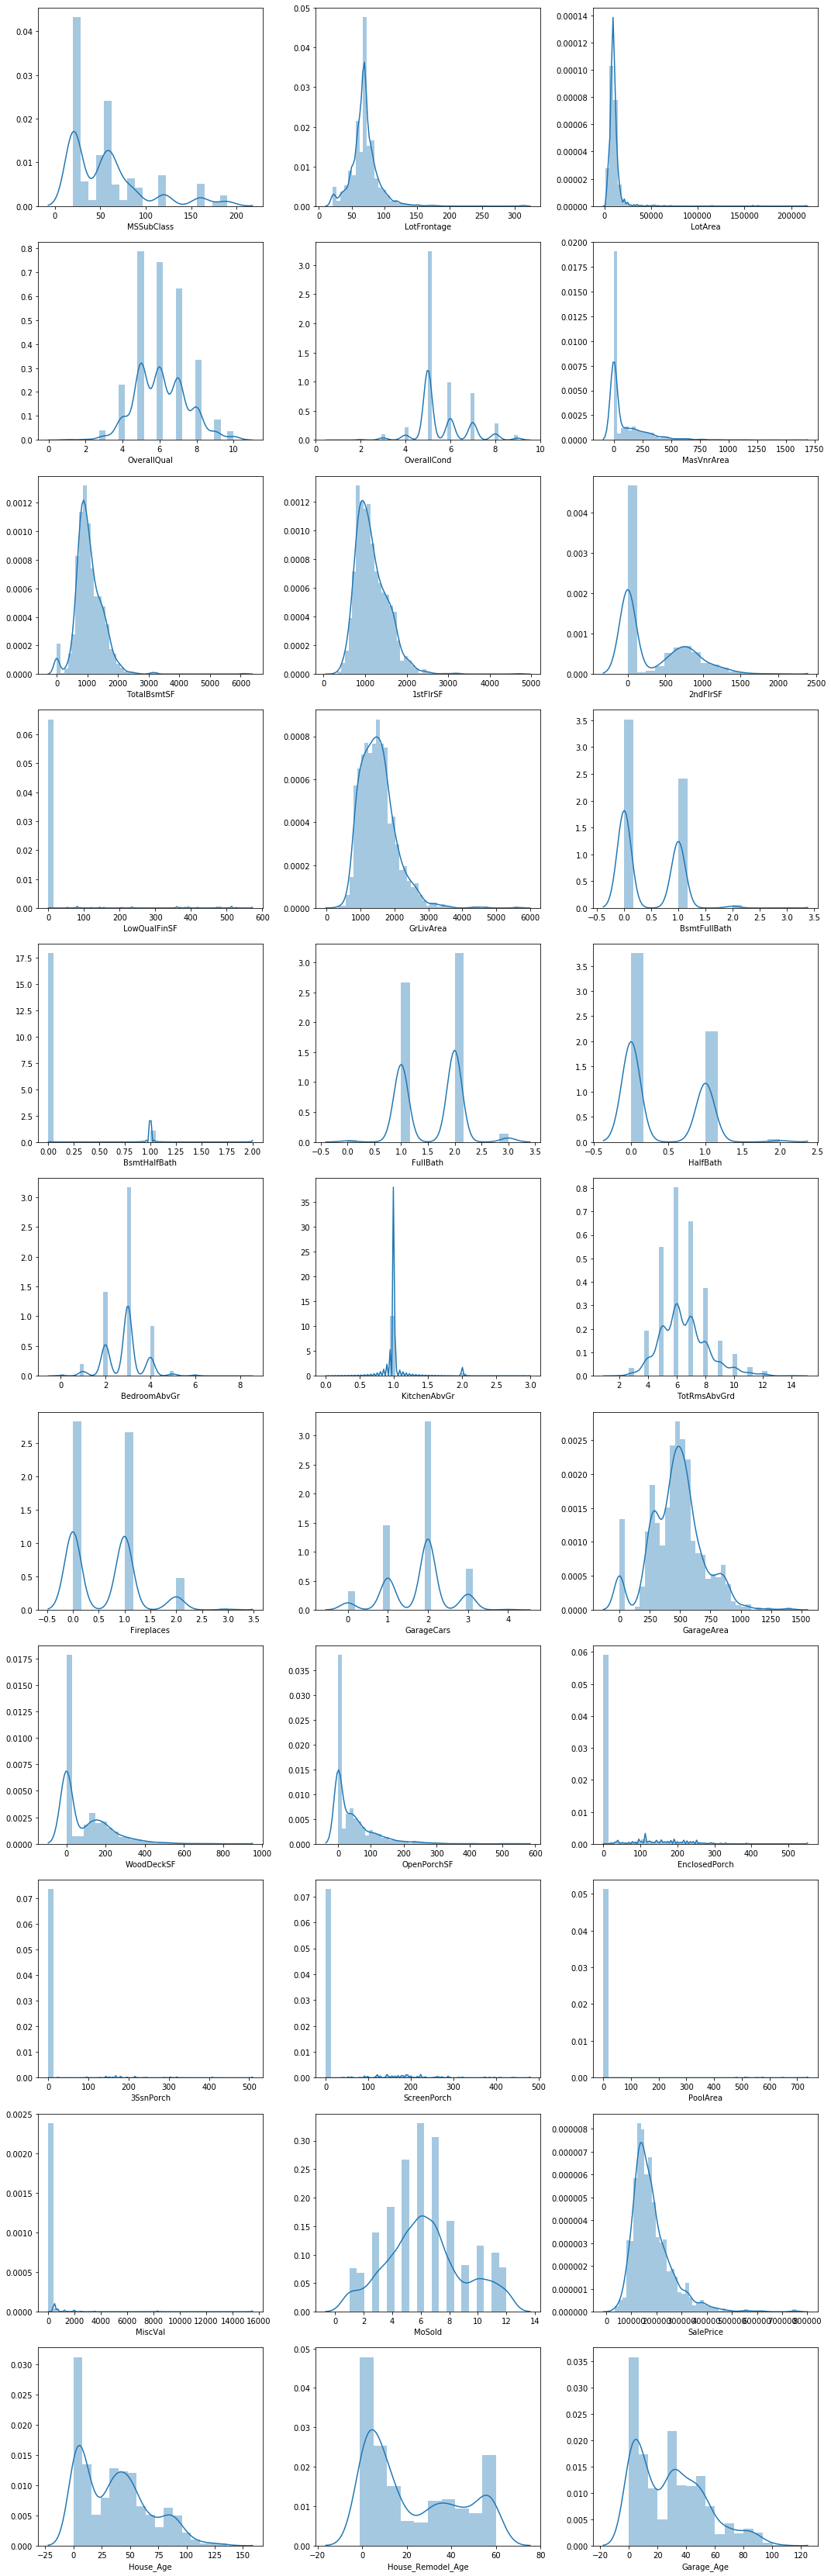

In [46]:
##Analysing the distribution of some of the important numerical features

fig = plt.figure(figsize=(15,50))
for i, col in enumerate(data.select_dtypes(exclude='object')):
    fig.add_subplot(12,3,1+i)
    sns.distplot(data[col],kde=True)
fig.tight_layout()
fig.show()

Let us find the top-correlated features to identify multi-collinearity (we shall remove correlation>60%) using corr() code,since heatmap is too large to visualize for 80 features

In [47]:
#Log-Transforming the skewed columns Column

data['SalePrice']=np.log(data['SalePrice'])
data['1stFlrSF']=np.log(data['1stFlrSF'])
data['GrLivArea']=np.log(data['GrLivArea'])

In [48]:
data1=data.drop('SalePrice',axis=1)
data_corr = data1.corr()
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null by condiioning the matrix value to boolean
upper_matrix = data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
upper_matrix=upper_matrix.unstack().reset_index()
upper_matrix.columns=['Column 1','Column 2','Correlation']
upper_matrix=upper_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
upper_matrix

,Column 1,Column 2,Correlation
659,GarageArea,GarageCars,0.882475
554,TotRmsAbvGrd,GrLivArea,0.825498
1021,Garage_Age,House_Age,0.781323
230,1stFlrSF,TotalBsmtSF,0.779571
559,TotRmsAbvGrd,BedroomAbvGr,0.676620
328,GrLivArea,2ndFlrSF,0.662904
426,FullBath,GrLivArea,0.653160
1022,Garage_Age,House_Remodel_Age,0.618937
552,TotRmsAbvGrd,2ndFlrSF,0.616423
323,GrLivArea,OverallQual,0.614210


In [49]:
##As seen we shall remove one of the features as they are highly collinear

data.drop(['GarageCars','TotRmsAbvGrd','1stFlrSF','Garage_Age','GrLivArea','TotRmsAbvGrd','GrLivArea','HalfBath'],axis=1,inplace=True)

In [50]:
data1=data.drop('SalePrice',axis=1)
data_corr = data1.corr()
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null by condiioning the matrix value to boolean
upper_matrix = data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
upper_matrix=upper_matrix.unstack().reset_index()
upper_matrix.columns=['Column 1','Column 2','Correlation']
upper_matrix=upper_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
upper_matrix

,Column 1,Column 2,Correlation
674,House_Remodel_Age,House_Age,0.594195
393,GarageArea,OverallQual,0.562022
289,FullBath,OverallQual,0.550600
159,TotalBsmtSF,OverallQual,0.537808
319,BedroomAbvGr,2ndFlrSF,0.502901
396,GarageArea,TotalBsmtSF,0.486665
293,FullBath,2ndFlrSF,0.421378
133,MasVnrArea,OverallQual,0.407252
401,GarageArea,FullBath,0.405656
367,Fireplaces,OverallQual,0.396765


# 4.Building a baseline Linear Regression model using RFE method

Before building a LR model we need to do the following

1. Encode categorical variables
2. Scale the numerical data
3. Test-Train split and build LR model using RFE

In [51]:
#Categorical columns
data_to_impute=data.select_dtypes(include='object')


In [52]:
# convert into dummies - one hot encoding
data_dummies = pd.get_dummies(data_to_impute, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH-RM,MSZoning_RL,Street_Pave,Alley_None,Alley_Pave,LotShape_IR3-IR1,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Sev-Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs-Duplex-2fmCon,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav-Floor,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None-Po,GarageQual_TA,GarageCond_Po-None,GarageCond_TA-Gd,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_MnPrv,Fence_MnWw,Fence_None-GdPrv,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CSD-ConLI,SaleType_CWD,SaleType_New-Con,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0

In [53]:
# drop categorical variables
data = data.drop(list(data_to_impute.columns), axis=1)

In [54]:
# concat dummy variables with X
data = pd.concat([data, data_dummies], axis=1)

Test-Train split

In [55]:
X=data
y=data.pop('SalePrice')

In [56]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,House_Age,House_Remodel_Age,MSZoning_FV,MSZoning_RH-RM,MSZoning_RL,Street_Pave,Alley_None,Alley_Pave,LotShape_IR3-IR1,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Sev-Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs-Duplex-2fmCon,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav-Floor,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None-Po,GarageQual_TA,GarageCond_Po-None,GarageCond_TA-Gd,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_MnPrv,Fence_MnWw,Fence_None-GdPrv,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CSD-ConLI,SaleType_CWD,SaleType_New-Con,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,20,80.0,10400,7,6,288.0,1304,0,0,0,0,2,3,1,1,530,98,0,0,0,0,0,0,5,38,38,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1

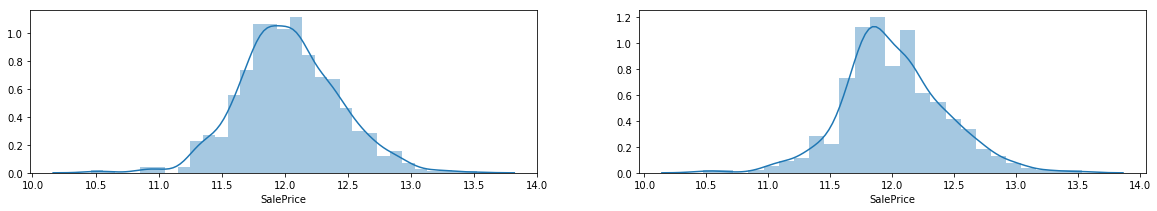

In [59]:
##To find out if the saleprice distribution is similar in train and test

plt.figure(figsize=[20,3])
ax0=plt.subplot(1,2,1)
sns.distplot(y_train)
ax1=plt.subplot(1,2,2)
sns.distplot(y_test)
plt.show()

The SalePrice are fairly the same in both cases

In [60]:
##Now Scaling the Numerical Variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [61]:
num_vars = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

In [62]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,House_Age,House_Remodel_Age,MSZoning_FV,MSZoning_RH-RM,MSZoning_RL,Street_Pave,Alley_None,Alley_Pave,LotShape_IR3-IR1,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Sev-Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs-Duplex-2fmCon,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav-Floor,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None-Po,GarageQual_TA,GarageCond_Po-None,GarageCond_TA-Gd,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_MnPrv,Fence_MnWw,Fence_None-GdPrv,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CSD-ConLI,SaleType_CWD,SaleType_New-Con,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.000000,0.202055,0.042534,0.666667,0.625,0.208999,0.213421,0.000000,0.0,0.000000,0.0,0.666667,0.375,0.5,0.333333,0.373766,0.114352,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.279412,0.639344,0,0,1,1,1,0,0,1,0

In [63]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [64]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,House_Age,House_Remodel_Age,MSZoning_FV,MSZoning_RH-RM,MSZoning_RL,Street_Pave,Alley_None,Alley_Pave,LotShape_IR3-IR1,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Sev-Mod,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Twnhs-Duplex-2fmCon,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav-Floor,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None-Po,GarageQual_TA,GarageCond_Po-None,GarageCond_TA-Gd,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_MnPrv,Fence_MnWw,Fence_None-GdPrv,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CSD-ConLI,SaleType_CWD,SaleType_New-Con,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.000000,0.167808,0.033252,0.555556,0.875,0.000000,0.173322,0.000000,0.0,0.000000,0.5,0.333333,0.375,0.5,0.000000,0.186178,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.316176,0.065574,0,0,1,1,1,0,

Building the LR model iterartively using RFE

In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
# Running RFE with the output number of the variable equal to 20
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=40)            
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 92),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 175),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 165),
 ('FullBath', False, 52),
 ('BedroomAbvGr', False, 34),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 35),
 ('OpenPorchSF', False, 184),
 ('EnclosedPorch', False, 49),
 ('3SsnPorch', False, 31),
 ('ScreenPorch', False, 24),
 ('PoolArea', True, 1),
 ('MiscVal', False, 77),
 ('MoSold', False, 152),
 ('House_Age', True, 1),
 ('House_Remodel_Age', False, 8),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH-RM', True, 1),
 ('MSZoning_RL', True, 1),
 ('Street_Pave', False, 188),
 ('Alley_None', False, 143),
 ('Alley_Pave', False, 81),
 ('LotShape_IR3-IR1', False, 104),
 ('LotShape_Reg', False, 105),
 ('LandContour_HLS', False, 85),
 ('LandContour_Lo

In [68]:
## Taking only the rfe support columns
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'PoolArea', 'House_Age', 'MSZoning_FV', 'MSZoning_RH-RM', 'MSZoning_RL', 'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_Stone', 'ExterCond_Po', 'BsmtExposure_None', 'BsmtFinType2_None', 'Heating_Grav-Floor', 'Electrical_FuseP', 'Functional_Maj2', 'Functional_Sev', 'GarageType_Basment', 'GarageQual_None-Po', 'GarageCond_Po-None', 'PoolQC_Gd', 'PoolQC_None', 'MiscFeature_Othr', 'SaleType_Oth', 'SaleCondition_Alloca'], dtype='object')

Building the statistical models with these predictor variables with respect to target variable

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_mod_1 = sm.add_constant(X_train_rfe)

In [71]:
lm = sm.OLS(y_train,X_train_mod_1).fit()   # Running the linear model

In [72]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:05:56   Log-Likelihood:                 658.73
No. Observations:                1022   AIC:                            -1237.
Df Residuals:                     982   BIC:                            -1040.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.3460 

In [73]:
##Predicting on test data
X_test_rfe = X_test[X_train_rfe.columns]


In [74]:
X_test_mod_1 = sm.add_constant(X_test_rfe)

In [75]:
lm = sm.OLS(y_test,X_test_mod_1).fit()

In [76]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          1.64e-188
Time:                        08:05:57   Log-Likelihood:                 289.69
No. Observations:                 438   AIC:                            -513.4
Df Residuals:                     405   BIC:                            -378.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.1391 

General inference:

1. We have obtained 87% Rsquared value in the training set and test dataset

2. Note that we have used RFE for feature selection, also we need to choose the features whcih are less correlated to other
   independant variables otherwise p-value would become >5% making that variable insignificant
   
3. Generally it is time consuming as we are not sure about the feature size and which feature to retain and which one to release as it might have business impact.

4. As a result, we are moving to the most sophosticated mechanism called Regularization, which is helpful in getting the top-predictors for the model with minimal human interaction

In [77]:
from sklearn.metrics import mean_absolute_error

In [78]:
## Checking with the linear regression model

from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [79]:
from sklearn.metrics import r2_score
y_pred_train=lm.predict(X_train_rfe)
R2_value_Train=r2_score(y_train,y_pred_train)
print('Train R2 value from sci-kit learn for the given model is',R2_value_Train)

Train R2 value from sci-kit learn for the given model is 0.8959287512889689


In [80]:
from sklearn.metrics import r2_score
y_pred_test=lm.predict(X_test_rfe)
R2_value_test=r2_score(y_test,y_pred_test)
print('Test R2 value from sci-kit learn for the given model is',R2_value_test)

Test R2 value from sci-kit learn for the given model is 0.812294718270406


In [81]:
from sklearn.metrics import r2_score, mean_squared_error
metric1=[]
metric1.append(round(R2_value_Train,2))
metric1.append(round(R2_value_test,2))
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric1.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric1.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric1.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric1.append(round(mse_test_lr**0.5,2))


mae_train_lr = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error in Training data......',(mae_train_lr))
metric1.append(round(mae_train_lr,2))

mae_test_lr = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error in Test data......',(mae_test_lr))
metric1.append(round(mae_test_lr,2))


Sum of Squared Residual Training data Error..... 16.486527151674043
Sum of Squared Residual Test data Error..... 13.947444763194255
Root Mean Squared Error in Training data...... 0.1270103588841041
Root Mean Squared Error in Test data...... 0.17844741857059024
Mean Absolute Error in Training data...... 0.09087097311482233
Mean Absolute Error in Test data...... 0.10993516094594476


# 5. Model building using Ridge Regression

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [85]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=0.0001)

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score value for train.....',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score value for test.....',r2_test_lr)
metric2.append(round(r2_test_lr,2))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric2.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric2.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric2.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric2.append(round(mse_test_lr**0.5,2))

mae_train_lr = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error in Training data......',(mae_train_lr))
metric2.append(round(mae_train_lr,2))

mae_test_lr = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error in Test data......',(mae_test_lr))
metric2.append(round(mae_test_lr,2))


R2 score value for train..... 0.9414451513196361
R2 score value for test..... 0.8537930246407408
Sum of Squared Residual Training data Error..... 9.276011526598118
Sum of Squared Residual Test data Error..... 10.863912267288452
Root Mean Squared Error in Training data...... 0.09526978648977008
Root Mean Squared Error in Test data...... 0.1574911193211926
Mean Absolute Error in Training data...... 0.06755146653311324
Mean Absolute Error in Test data...... 0.10086049094961089


# 6.Model building using Laso Regression

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [90]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score value for train.....',r2_train_lr)
metric3.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score value for test.....',r2_test_lr)
metric3.append(round(r2_test_lr,2))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric3.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric3.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric3.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric3.append(round(mse_test_lr**0.5,2))

mae_train_lr = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error in Training data......',(mae_train_lr))
metric3.append(round(mae_train_lr,2))

mae_test_lr = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error in Test data......',(mae_test_lr))
metric3.append(round(mae_test_lr,2))


R2 score value for train..... 0.9306227794999581
R2 score value for test..... 0.8729292666998019
Sum of Squared Residual Training data Error..... 10.990445907471663
Sum of Squared Residual Test data Error..... 9.44199341325022
Root Mean Squared Error in Training data...... 0.10370082432755746
Root Mean Squared Error in Test data...... 0.14682323585634963
Mean Absolute Error in Training data...... 0.07542875589027143
Mean Absolute Error in Test data...... 0.09986431790265834


# 7.Creating Metrics for each method obtained.

In [92]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)','MAE(Train)','MAE(Test)'], 
        'Linear Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.90,0.94,0.93
1,R2 Score (Test),0.81,0.85,0.87
2,RSS (Train),16.49,9.28,10.99
3,RSS (Test),13.95,10.86,9.44
4,RMSE (Train),0.13,0.10,0.10
5,RMSE (Test),0.18,0.16,0.15
6,MAE(Train),0.09,0.07,0.08
7,MAE(Test),0.11,0.10,0.10


Lets observe the changes in the coefficients after regularization

In [93]:
betas = pd.DataFrame(index=X.columns)

In [94]:
betas.rows = X.columns

In [95]:
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [96]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False)

,Linear,Ridge,Lasso
PoolArea,4.678092e+00,4.541488,1.495845e+00
PoolQC_None,3.575504e+00,3.305384,9.938540e-01
TotalBsmtSF,1.882737e+00,1.439848,8.263097e-01
OverallQual,1.832926e-01,0.420786,4.930061e-01
2ndFlrSF,3.572562e-01,0.470202,4.043544e-01
LotArea,-7.062041e-02,0.384657,3.256109e-01
SaleCondition_Alloca,1.484325e-01,0.214948,3.137206e-01
GarageArea,2.639605e-01,0.316701,2.949173e-01
BedroomAbvGr,2.600795e-01,0.197073,2.666308e-01
OverallCond,3.566726e-01,0.297359,2.524029e-01


# 8.Checking for assumptions in Linear Regression if met

Text(0.5,1,'Error distribution in test set')

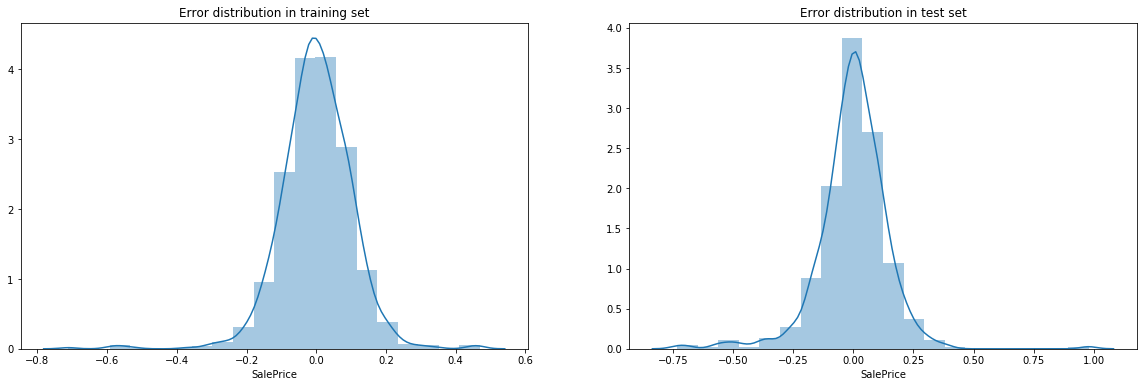

In [97]:
##Error terms are normally distributed
plt.figure(figsize=[20,6])
ax1=plt.subplot(1,2,1)
sns.distplot((y_train - y_pred_train), bins = 20)
plt.title('Error distribution in training set')
ax2=plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_test), bins = 20)
plt.title('Error distribution in test set')

Clearly the residuals in training and testing data shows the normal distribution we can comment the following from it

1. Most of the time the regressor line predicts the points correctly i.,e the difference in y_pred and y_true is zero most of the time.
2. There are only few extremes on either side which the regressor line makes notable error however this frequency is far less
3. Same distriution on test and train implies that the regression has performed well on the data points for training and learning

Text(352.739,0.5,'Residual')

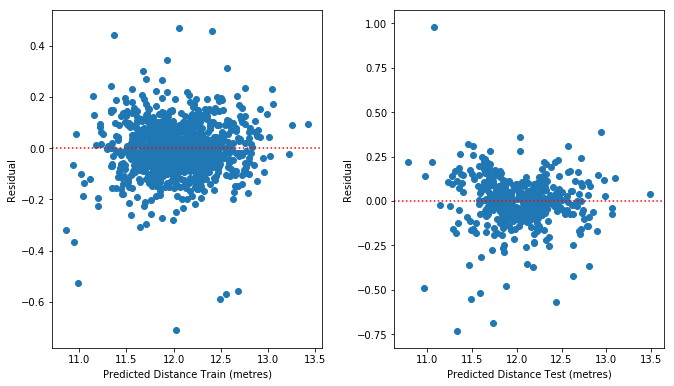

In [98]:
fig=plt.figure(figsize=[10,6])
ax1=plt.subplot(1,2,1)
plt.scatter( y_pred_train , y_train - y_pred_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance Train (metres)")
plt.ylabel("Residual")
ax2=plt.subplot(1,2,2)
plt.scatter( y_pred_test , y_test - y_pred_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance Test (metres)")
fig.tight_layout(pad=3.0)
plt.ylabel("Residual")


We could find that the distribution of variance of error is clustered in the center and there is not any deviating trend in the variance

# 9.Solving the subjective questions

Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Doubling alpha: 0.0002 for ridge



In [99]:
alpha = 0.0002
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)

Ridge(alpha=0.0002)

In [100]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge1.predict(X_train)
y_pred_test = ridge1.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score value for train.....',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score value for test.....',r2_test_lr)
metric2.append(round(r2_test_lr,2))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric2.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric2.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric2.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric2.append(round(mse_test_lr**0.5,2))

R2 score value for train..... 0.9414425330719725
R2 score value for test..... 0.8521712209270216
Sum of Squared Residual Training data Error..... 9.276426298321631
Sum of Squared Residual Test data Error..... 10.984420425105917
Root Mean Squared Error in Training data...... 0.09527191643385825
Root Mean Squared Error in Test data...... 0.15836219702140816


Doubling alpha: 0.0002 for lasso

In [101]:
alpha = 0.0002
lasso1 = Lasso(alpha=alpha)
lasso1.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [102]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso1.predict(X_train)
y_pred_test = lasso1.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score value for train.....',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score value for test.....',r2_test_lr)
metric2.append(round(r2_test_lr,2))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric2.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric2.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric2.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric2.append(round(mse_test_lr**0.5,2))

R2 score value for train..... 0.9198502948890321
R2 score value for test..... 0.8700840152324536
Sum of Squared Residual Training data Error..... 12.696977367684617
Sum of Squared Residual Test data Error..... 9.653409881197053
Root Mean Squared Error in Training data...... 0.11146145932806854
Root Mean Squared Error in Test data...... 0.14845790173381773


Finding the best predictors using this modified values of alphas for ridge and lasso

In [103]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge1.coef_
betas['Lasso'] = lasso1.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False)

,Ridge,Lasso
TotalBsmtSF,1.439484,6.417265e-01
OverallQual,0.420847,5.376295e-01
2ndFlrSF,0.470286,3.995300e-01
SaleCondition_Alloca,0.215109,3.157572e-01
GarageArea,0.316569,2.889936e-01
BedroomAbvGr,0.197257,2.834779e-01
LotArea,0.384036,2.637581e-01
OverallCond,0.297625,2.367526e-01
Neighborhood_StoneBr,0.138636,1.471678e-01
Neighborhood_Crawfor,0.117588,1.372261e-01


After the changes we shall infer that the following are top-predictors:
    1. TotalBsmtSF
    2. OverallQual
    3. 2ndFlrSF
    4. SaleCondition_Alloca	
    5. GarageArea

Q2: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [104]:
X_train.drop(['PoolArea','PoolQC_None','TotalBsmtSF','OverallQual','2ndFlrSF'],axis=1,inplace=True)
X_test.drop(['PoolArea','PoolQC_None','TotalBsmtSF','OverallQual','2ndFlrSF'],axis=1,inplace=True)


Lasso Modelling

In [105]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [107]:
alpha = 0.001
lasso= Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [108]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score value for train.....',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score value for test.....',r2_test_lr)
metric2.append(round(r2_test_lr,2))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric2.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric2.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric2.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric2.append(round(mse_test_lr**0.5,2))

mae_train_lr = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error in Training data......',(mae_train_lr))
metric2.append(round(mae_train_lr,2))

mae_test_lr = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error in Test data......',(mae_test_lr))
metric2.append(round(mae_test_lr,2))


R2 score value for train..... 0.8704917961218415
R2 score value for test..... 0.8458326890264715
Sum of Squared Residual Training data Error..... 20.516142028143843
Sum of Squared Residual Test data Error..... 11.455405166441139
Root Mean Squared Error in Training data...... 0.14168451913656183
Root Mean Squared Error in Test data...... 0.16172165307733696
Mean Absolute Error in Training data...... 0.10263328763129785
Mean Absolute Error in Test data...... 0.11242427008439981


Ridge Modelling

In [109]:
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [111]:
alpha = 4.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=4.0)

In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score value for train.....',r2_train_lr)
metric2.append(round(r2_train_lr,2))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score value for test.....',r2_test_lr)
metric2.append(round(r2_test_lr,2))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Sum of Squared Residual Training data Error.....',rss1_lr)
metric2.append(round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Sum of Squared Residual Test data Error.....',rss2_lr)
metric2.append(round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Root Mean Squared Error in Training data......',(mse_train_lr)**0.5)
metric2.append(round(mse_train_lr**0.5,2))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Root Mean Squared Error in Test data......',(mse_test_lr)**0.5)
metric2.append(round(mse_test_lr**0.5,2))

mae_train_lr = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error in Training data......',(mae_train_lr))
metric2.append(round(mae_train_lr,2))

mae_test_lr = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error in Test data......',(mae_test_lr))
metric2.append(round(mae_test_lr,2))


R2 score value for train..... 0.8965474626564907
R2 score value for test..... 0.8506352572130417
Sum of Squared Residual Training data Error..... 16.38851351307516
Sum of Squared Residual Test data Error..... 11.098550240003014
Root Mean Squared Error in Training data...... 0.12663225303176648
Root Mean Squared Error in Test data...... 0.15918277481905396
Mean Absolute Error in Training data...... 0.09332816614276122
Mean Absolute Error in Test data...... 0.1116669876759335


Finding the best predictors using this modified values of alphas for ridge and lasso

In [113]:
X=X[X_train.columns]
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False)

,Ridge,Lasso
BedroomAbvGr,0.320086,4.482717e-01
GarageArea,0.281392,4.216711e-01
FullBath,0.240718,2.751246e-01
OverallCond,0.194705,2.050840e-01
Neighborhood_StoneBr,0.169816,1.879170e-01
Fireplaces,0.124725,1.430442e-01
Neighborhood_NoRidge,0.145463,1.424692e-01
Neighborhood_Crawfor,0.137178,1.389057e-01
Exterior1st_BrkFace,0.138854,1.340406e-01
BsmtFullBath,0.110166,1.160593e-01


Now the important top five feature becomes:
    1. BedroomAbvGr
    2. GarageArea	
    3. FullBath
    4. OverallCond
    5. Neighborhood_StoneBr